In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [78]:
df_i = pd.read_csv('results_i.csv')
df_s = pd.read_csv('results_s.csv')

In [79]:
df_Am = df_s[(df_s['num_s'] == df_s['num_s'].max()) & (df_s['s_method'] == 'Orthogonal Sampling')]
Am = df_Am['area'].mean()
# Am = 1.506484

df_i['abs_diff'] = df_i['area'] - Am
df_s['abs_diff'] = df_s['area'] - Am

Am

1.533748148148148

In [68]:
print(df_i.head())
print(df_s.head())

   iteration  area  repetition     s_method  abs_diff
0          6  2.44           1  Monte Carlo  0.906252
1          7  2.32           1  Monte Carlo  0.786252
2          8  2.00           1  Monte Carlo  0.466252
3          9  1.76           1  Monte Carlo  0.226252
4         10  2.24           1  Monte Carlo  0.706252
   num_s      area  repetition     s_method  abs_diff
0    100  1.120000           1  Monte Carlo -0.413748
1    121  1.983471           1  Monte Carlo  0.449723
2    144  0.777778           1  Monte Carlo -0.755970
3    169  1.136095           1  Monte Carlo -0.397653
4    196  1.469388           1  Monte Carlo -0.064360


In [69]:
df_i_MC = df_i[(df_i.s_method != 'Latin Hypercube') & (df_i.s_method != 'Orthogonal Sampling')]
df_s_MC = df_s[(df_s.s_method != 'Latin Hypercube') & (df_s.s_method != 'Orthogonal Sampling')]

In [70]:
df_i = df_i[(df_i.s_method == 'Monte Carlo') | (df_i.s_method == 'Latin Hypercube') \
     | (df_i.s_method == 'Orthogonal Sampling')]
df_s = df_s[(df_s.s_method == 'Monte Carlo') | (df_s.s_method == 'Latin Hypercube') \
     | (df_s.s_method == 'Orthogonal Sampling')]

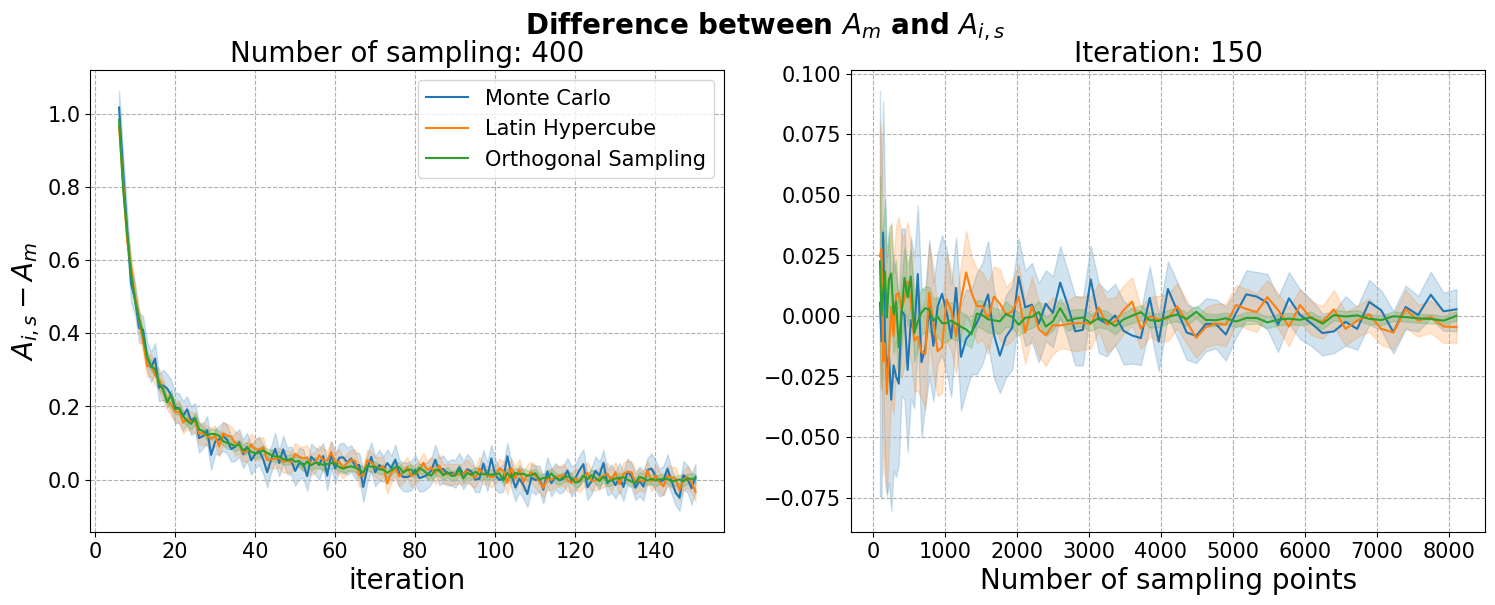

In [71]:
'''Without RuntimeWarning handling'''

plt.rcParams['figure.figsize'] = (18, 6)
fig1, ax1 = plt.subplots(1, 2)

sns.lineplot(data=df_i, x='iteration', y='abs_diff', hue='s_method', errorbar='ci', ax=ax1[0])
sns.lineplot(data=df_s, x='num_s', y='abs_diff', hue='s_method', errorbar='ci', ax=ax1[1])

# ax1[0].plot(np.arange(6, 151), np.repeat([Am], 145), 'k-.', label=r'$A_M$', zorder=6)
# ax1[1].plot(np.arange(0, 90**2), np.repeat([Am], 90**2), 'k-.', label=r'$A_M$', zorder=4)

fig1.suptitle(r'Difference between $A_m$ and $A_{i,s}$', fontsize=20, fontweight='bold')

ax1[0].set_title('Number of sampling: 400', fontsize=20)
# ax1[0].set_ylim(bottom=0)
ax1[0].set_xlabel('iteration', fontsize=20)
ax1[0].set_ylabel(r'$A_{i,s} - A_m$', fontsize=20)
ax1[0].tick_params(axis='both', which='major', labelsize=15)
ax1[0].legend(fontsize=15)
ax1[0].grid(linestyle='--')

ax1[1].set_title('Iteration: 150', fontsize=20)
# ax1[1].set_ylim(bottom=0)
ax1[1].set_xlabel('Number of sampling points', fontsize=20)
ax1[1].set_ylabel('')
ax1[1].tick_params(axis='both', which='major', labelsize=15)
ax1[1].get_legend().remove()
ax1[1].grid(linestyle='--')

plt.show()

In [39]:
# '''
# Note the figure in this block is generated with RuntimeWarning handling,
# compared to the figure above, the average area is much larger.
# '''

# plt.rcParams['figure.figsize'] = (18, 6)
# fig1, ax1 = plt.subplots(1, 2)

# sns.lineplot(data=df_i, x='iteration', y='area', hue='s_method', errorbar='ci', ax=ax1[0])
# sns.lineplot(data=df_s, x='num_s', y='area', hue='s_method', errorbar='ci', ax=ax1[1])

# ax1[0].plot(np.arange(0, 61), np.repeat([Am], 61), 'k-.', label=r'$A_M$', zorder=6)
# ax1[1].plot(np.arange(0, 90**2), np.repeat([Am], 90**2), 'k-.', label=r'$A_M$', zorder=4)


# ax1[0].set_title('Mandelbrot set area, num_sampling=100', fontsize=20)
# ax1[0].set_xlabel('iteration', fontsize=15)
# ax1[0].set_ylabel('mandelbrot set area', fontsize=15)
# ax1[0].tick_params(axis='both', which='major', labelsize=15)
# ax1[0].legend(fontsize=15)

# ax1[1].set_title('Mandelbrot set area, iteration=100', fontsize=20)
# ax1[1].set_xlabel('Number of sampling points', fontsize=15)
# ax1[1].set_ylabel('')
# ax1[1].tick_params(axis='both', which='major', labelsize=15)
# ax1[1].get_legend().remove()

# plt.show()

In [93]:
fig1.savefig('i-s experiments.pdf', bbox_inches='tight')

### New sampling method

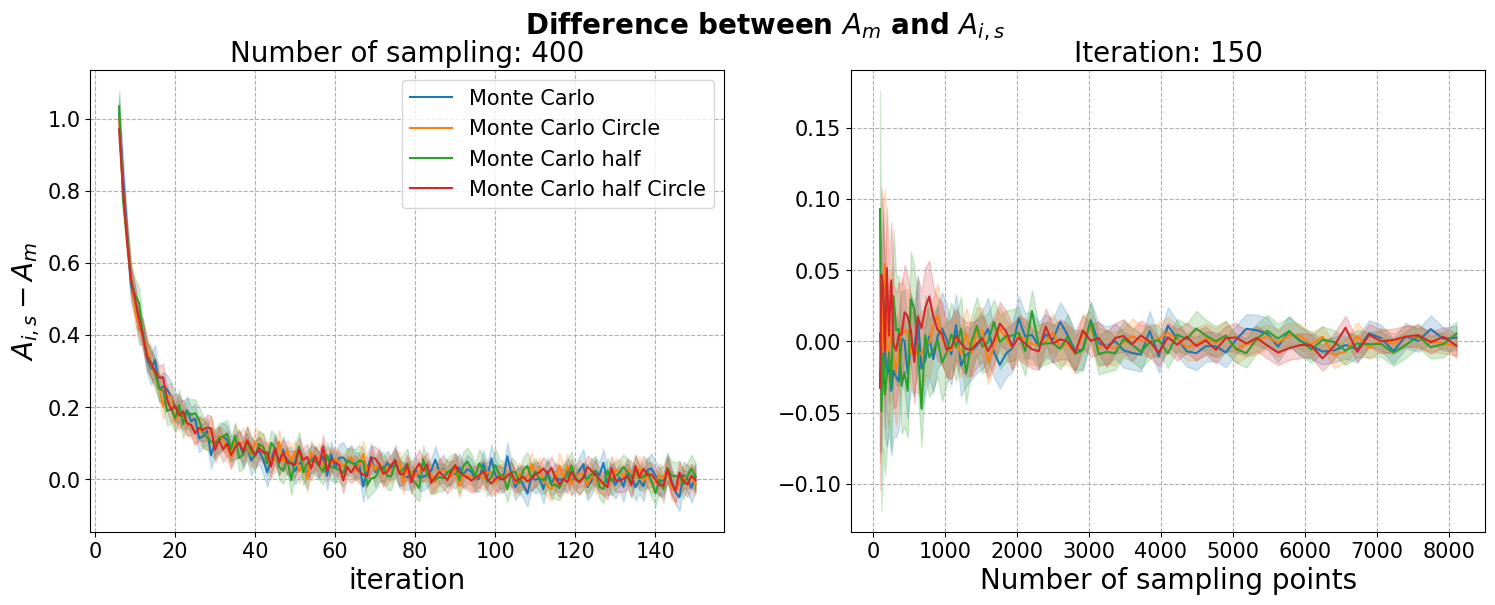

In [97]:
'''Without RuntimeWarning handling'''

plt.rcParams['figure.figsize'] = (18, 6)
fig2, ax2 = plt.subplots(1, 2)

sns.lineplot(data=df_i_MC, x='iteration', y='abs_diff', hue='s_method', errorbar='ci', ax=ax2[0])
sns.lineplot(data=df_s_MC, x='num_s', y='abs_diff', hue='s_method', errorbar='ci', ax=ax2[1])

# ax2[0].plot(np.arange(6, 121), np.repeat([1.506484], 115), 'k-.', label=r'$A_M$', zorder=6)
# ax2[1].plot(np.arange(0, 90**2), np.repeat([1.506484], 90**2), 'k-.', label=r'$A_M$', zorder=4)

fig2.suptitle(r'Difference between $A_m$ and $A_{i,s}$', fontsize=20, fontweight='bold')

ax2[0].set_title('Number of sampling: 400', fontsize=20)
# ax2[0].set_ylim(bottom=0)
ax2[0].set_xlabel('iteration', fontsize=20)
ax2[0].set_ylabel(r'$A_{i,s} - A_m$', fontsize=20)
ax2[0].tick_params(axis='both', which='major', labelsize=15)
ax2[0].legend(fontsize=15)
ax2[0].grid(linestyle='--')

ax2[1].set_title('Iteration: 150', fontsize=20)
# ax2[1].set_ylim(bottom=0)
ax2[1].set_xlabel('Number of sampling points', fontsize=20)
ax2[1].set_ylabel('')
ax2[1].tick_params(axis='both', which='major', labelsize=15)
ax2[1].get_legend().remove()
ax2[1].grid(linestyle='--')

plt.show()

In [98]:
fig2.savefig('MC experiments.pdf', bbox_inches='tight')

### Hypothesis test

In [2]:
from scipy.stats import ttest_ind

In [84]:
'''i-experiments'''
MC = df_i[df_i.s_method == 'Monte Carlo'].groupby(['iteration']).mean()
LHS = df_i[df_i.s_method == 'Latin Hypercube'].groupby(['iteration']).mean()
OS = df_i[df_i.s_method == 'Orthogonal Sampling'].groupby(['iteration']).mean()

print('T-test for MC and LHS is: ', ttest_ind(MC['abs_diff'], LHS['abs_diff']))
print('T-test for MC and OS is: ', ttest_ind(MC['abs_diff'], OS['abs_diff']))
print('T-test for LHS and OS is: ', ttest_ind(LHS['abs_diff'], OS['abs_diff']))

T-test for MC and LHS is:  Ttest_indResult(statistic=-0.02451473023275567, pvalue=0.9804590110141373)
T-test for MC and OS is:  Ttest_indResult(statistic=0.006217101236412413, pvalue=0.9950438070872814)
T-test for LHS and OS is:  Ttest_indResult(statistic=0.03121605789463603, pvalue=0.9751188553934389)


In [81]:
'''s-experiments'''
MC = df_s[df_s.s_method == 'Monte Carlo'].groupby(['num_s']).mean()
LHS = df_s[df_s.s_method == 'Latin Hypercube'].groupby(['num_s']).mean()
OS = df_s[df_s.s_method == 'Orthogonal Sampling'].groupby(['num_s']).mean()

print('T-test for MC and LHS is: ', ttest_ind(MC['abs_diff'], LHS['abs_diff']))
print('T-test for MC and OS is: ', ttest_ind(MC['abs_diff'], OS['abs_diff']))
print('T-test for LHS and OS is: ', ttest_ind(LHS['abs_diff'], OS['abs_diff']))

T-test for MC and LHS is:  Ttest_indResult(statistic=-1.1515031921718675, pvalue=0.2512430775885897)
T-test for MC and OS is:  Ttest_indResult(statistic=-2.0672480276702396, pvalue=0.04032139468287869)
T-test for LHS and OS is:  Ttest_indResult(statistic=-0.8801797993178823, pvalue=0.38008203832237)


In [82]:
'''MC i-experiments'''
MC = df_i_MC[df_i_MC.s_method == 'Monte Carlo'].groupby(['iteration']).mean()
MC_c = df_i_MC[df_i_MC.s_method == 'Monte Carlo Circle'].groupby(['iteration']).mean()
MC_h = df_i_MC[df_i_MC.s_method == 'Monte Carlo half'].groupby(['iteration']).mean()
MC_hc = df_i_MC[df_i_MC.s_method == 'Monte Carlo half Circle'].groupby(['iteration']).mean()

print('T-test for MC and MC circle is: ', ttest_ind(MC['abs_diff'], MC_c['abs_diff']))
print('T-test for MC and MC half is: ', ttest_ind(MC['abs_diff'], MC_h['abs_diff']))
print('T-test for MC and MC half circle is: ', ttest_ind(MC['abs_diff'], MC_hc['abs_diff']))

T-test for MC and MC circle is:  Ttest_indResult(statistic=-0.0255887389631689, pvalue=0.9796030891726215)
T-test for MC and MC half is:  Ttest_indResult(statistic=-0.014585296447440176, pvalue=0.9883731283063437)
T-test for MC and MC half circle is:  Ttest_indResult(statistic=0.0003690980387061889, pvalue=0.9997057579090625)


In [83]:
'''MC s-experiments'''
MC = df_s_MC[df_s_MC.s_method == 'Monte Carlo'].groupby(['num_s']).mean()
MC_c = df_s_MC[df_s_MC.s_method == 'Monte Carlo Circle'].groupby(['num_s']).mean()
MC_h = df_s_MC[df_s_MC.s_method == 'Monte Carlo half'].groupby(['num_s']).mean()
MC_hc = df_s_MC[df_s_MC.s_method == 'Monte Carlo half Circle'].groupby(['num_s']).mean()

print('T-test for MC and MC circle is: ', ttest_ind(MC['abs_diff'], MC_c['abs_diff']))
print('T-test for MC and MC half is: ', ttest_ind(MC['abs_diff'], MC_h['abs_diff']))
print('T-test for MC and MC half circle is: ', ttest_ind(MC['abs_diff'], MC_hc['abs_diff']))

T-test for MC and MC circle is:  Ttest_indResult(statistic=-1.5759661735028958, pvalue=0.11700877938934749)
T-test for MC and MC half is:  Ttest_indResult(statistic=-0.3270432941979037, pvalue=0.7440626036799018)
T-test for MC and MC half circle is:  Ttest_indResult(statistic=-3.0386161990829073, pvalue=0.002776632997569651)


### Accuracy

In [23]:
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, h

In [86]:
MC_convergence_i = df_i[(df_i.s_method == 'Monte Carlo') & \
    (df_i.iteration == df_i.iteration.max())].area.to_list()

LHS_convergence_i = df_i[(df_i.s_method == 'Latin Hypercube') & \
    (df_i.iteration == df_i.iteration.max())].area.to_list()
    
OS_convergence_i = df_i[(df_i.s_method == 'Orthogonal Sampling') & \
    (df_i.iteration == df_i.iteration.max())].area.to_list()

In [87]:
MC_ci_i = mean_confidence_interval(MC_convergence_i)
LHS_ci_i = mean_confidence_interval(LHS_convergence_i)
OS_ci_i = mean_confidence_interval(OS_convergence_i)

In [88]:
print(MC_ci_i, LHS_ci_i, OS_ci_i)

(1.5416, 0.038122540281425615) (1.5008000000000001, 0.026230446966781566) (1.5365333333333333, 0.01286793368185818)


In [90]:
MC_convergence_s = df_s[(df_s.s_method == 'Monte Carlo') & \
    (df_s.num_s == df_s.num_s.max())].area.to_list()

LHS_convergence_s = df_s[(df_s.s_method == 'Latin Hypercube') & \
    (df_s.num_s == df_s.num_s.max())].area.to_list()
    
OS_convergence_s = df_s[(df_s.s_method == 'Orthogonal Sampling') & \
    (df_s.num_s == df_s.num_s.max())].area.to_list()

In [91]:
MC_ci_s = mean_confidence_interval(MC_convergence_s)
LHS_ci_s = mean_confidence_interval(LHS_convergence_s)
OS_ci_s = mean_confidence_interval(OS_convergence_s)

In [92]:
print(MC_ci_s, LHS_ci_s, OS_ci_s)

(1.5364609053497942, 0.008527087856293624) (1.5291259259259258, 0.006428047842849855) (1.533748148148148, 0.0018629391715241552)
